# Modelos de regressão 1
Índice <a name="topo"></a>

1. [Análise gráfica](#1)
2. [Modelo de regressão linear simples pelo stats models](#2)
3. [Exploração do objeto que contém os resultados do modelo](#3)
    - [Como predizer novas observações?](#3.1)
    - [Onde o Python guarda os parâmetros?](#3.2)

In [4]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [5]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## 1. Análise gráfica <a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     
Já vimos essa análise gráfica no curso. Uma boa análise descritiva é fundamental para termos um modelo estatístico de sucesso. Abaixo está o código do gráfico que já discutimos na apresentação.

(0.0, 10.5)

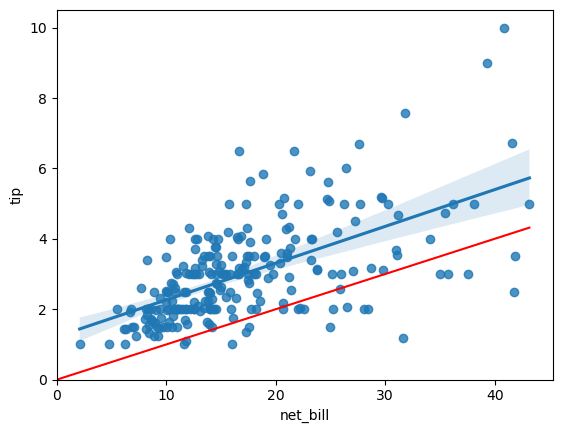

In [6]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

## 2. Modelo de regressão linear simples pelo stats models<a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     
Abaixo, observe a sintaxe que define o modelo de regressão utilizando o API do pacote *formula* do stats models. A sintaxe é até bastante simples, possui semelhanças com o *scikitlearn* (o ```.fit()``` no caso), e caso você conheça o software *R*, a parte ```'tip ~ net_bill'``` vai ser familiar pra você.

Com esse pacote *formula* do statsmodels podemos definir a equação do modelo de uma forma flexível e prática. Abaixo, a variável que está à esquerda do ```~``` é a variável resposta, e a variável à direita é a variável explicativa. O statsmodels completa com os modelos da regressão linear, e estima os parâmetros para nós com o comando ```.fit()```. Criamos então o objeto ```reg```, que possui a nossa regressão já "treinada".

Há diversos métodos e atributos nesse objeto, como o método ```reg.summary()``` que nos fornece um output bem completo do modelo de regressão.

In [7]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        12:43:42   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Exploração do objeto que contém os resultados do modelo<a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

#### Predição de dados novos<a name="3.1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

Se quisermos predizer novos dados, precisamos em primeiro lugar que estes dados estejam no mesmo formato que os dados originais. Abaixo vamos utilizar as 5 primeiras linhas do dataframe ```tips```, simulando a situação em que fossem novos dados que precisam ser preditos.

Em seguida, de forma similar ao *scikitlearn*, podemos predizer esses dados com o método ```.predict()```.

Este objeto ```reg``` que criamos, possui uma diversidade de métodos e atributos, como o atributo ```.params```, que guarda os parâmetros principais do modelo.

In [6]:
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
# Predição de dados novos
reg.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

In [9]:
type(reg)

statsmodels.regression.linear_model.RegressionResultsWrapper

#### Onde o Python guarda os parâmetros?<a name="3.2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

O objeto que criamos e armazenamos na variável ```reg``` do Python é um objeto do tipo ```RegressionResultsWrapper``` do *statsmodels*. Esse objeto vem com uma diversidade de métodos e atributos que armazenam os resultados do modelo e podem ser acessados de forma prática. Digite: ```reg.``` e pressione a tecla **TAB** para explorar um pouco as possibilidades.

In [8]:
# Onde o Python guarda os parâmetros?
reg.params

Intercept    1.330698
net_bill     0.099334
dtype: float64